# Mount Drive

In [ ]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

# #Unmount drive
# from google.colab import drive
# drive.flush_and_unmount()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install the necessary modules 
!pip install nilearn
# !pip install "scikit-learn==0.22.1"
# !pip install "scipy==1.1.0"
# !pip install "numpy==1.15.1"
# !pip install tensorboardX
# !pip install torch-scatter==latest+cu101 torch-sparse==latest+cu101 -f https://pytorch-geometric.com/whl/torch-1.4.0.html
# !pip install "torch==1.4"

# Useful packages

In [ ]:
# import necessary packages
import nibabel as nib
import pandas as pd
import glob
import random
from nilearn import plotting
from nilearn.image import mean_img
import nibabel as nib
import torch 
import itertools
import torch.nn.functional as F
import torch.nn as nn
import torchvision
from sklearn import preprocessing
import torchvision.transforms as transforms
import torch.utils.data as data_utils
import csv
import numpy as np #for numeric computations
import seaborn as sb #high level visualization
import matplotlib.pyplot as plt # for visualization
from IPython.display import display_html #to display in html formats

In [ ]:
# #create folder for hcp dataset and download it
# !mkdir '/content/drive/My Drive/Project_final/brain_/data/hcp' 
# !wget http://cogspaces.github.io/assets/data/hcp_mask.nii.gz 
# !cp '/content/hcp_mask.nii.gz' '/content/drive/My Drive/Project_final/brain_/data/hcp'

In [ ]:
# # get dataset: archi, brainomics, hcp, camcan, la5c
# !python '/content/drive/My Drive/Project_final/brain_/data/get_data.py' hcp --fetch 
# !cp -r '/content/data/neurovault/' '/content/drive/My Drive/Project_final/brain_/data/neurovault/'

#Get Data

In [ ]:
# Get data from following command line. After execution, it will create a folder data/neurovault inside the content of the drive
# myfile = glob.glob('/content/drive/My Drive/Project_final/brain_/data/neurovault/collection_4341/*.nii.gz')
# from pandas import DataFrame
# df = DataFrame (myfile,columns=['zmap', 'study', 'subject', 'task', 'contrast'])
df = pd.read_csv('/content/drive/My Drive/Project_final/brain_/data/neurovault/dataframe.csv')

In [ ]:
df.head()

,Unnamed: 0,z_map,study,subject,task,contrast
0,0,/content/drive/My Drive/Project_final/brain_/d...,archi,14,parietal,object_grasp
1,1,/content/drive/My Drive/Project_final/brain_/d...,archi,48,localizer,damier_V
2,2,/content/drive/My Drive/Project_final/brain_/d...,archi,73,localizer,damier_H
3,3,/content/drive/My Drive/Project_final/brain_/d...,archi,75,localizer,motor-cognitive
4,4,/content/drive/My Drive/Project_final/brain_/d...,archi,24,localizer,clicGvideo


In [ ]:
# Generat dataframe.csv file corresponding to the downloaded dataset
def getIndexes(dfObj, value):
    ''' Get index positions of value in dataframe i.e. dfObj.'''
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = dfObj.isin([value])
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos[0]

# myfile = glob.glob('/content/drive/My Drive/Project_final/brain_/data/neurovault/collection_4339/*.nii.gz')
# l = []
# for i in df['z_map']:
#   if i not in myfile:
#      liste = list(getIndexes(df, i))
#      if df.loc[liste[0]]['study'] == 'archi':
#         df = df.drop([liste[0]])

In [ ]:
# # stats_df = get_statistics(df)
# stats_df.to_pickle("/content/drive/My Drive/Project_final/brain_/data/neurovault/hcp_stat/hcp.pkl")
# stats_df.to_csv("/content/drive/My Drive/Project_final/brain_/data/neurovault/hcp_stat/hcp.csv")
# df = resample_all(df)
# df.to_csv("/content/drive/My Drive/Project_final/brain_/data/neurovault/hcp/resampled_dataframe.csv")

# df = pd.read_csv("/content/drive/My Drive/Project_final/brain_/data/neurovault/hcp/resampled_dataframe.csv")
# #Download hcp dataset
# !python '/content/drive/My Drive/Project_final/brain_/data/download_hcp.py' '/content/drive/My Drive/Project_final/brain_/data/hcp'
# !mkdir '/content/drive/My Drive/Project_final/brain_/data/output'
# !python '/content/drive/My Drive/Project_final/brain_/data/parcellations.py' 256 -d/'content/drive/My Drive/Project_final/brain_/data/hcp' -o/'/content/drive/My Drive/Project_final/brain_/data/output'

# Data vizualisation and preprocessing


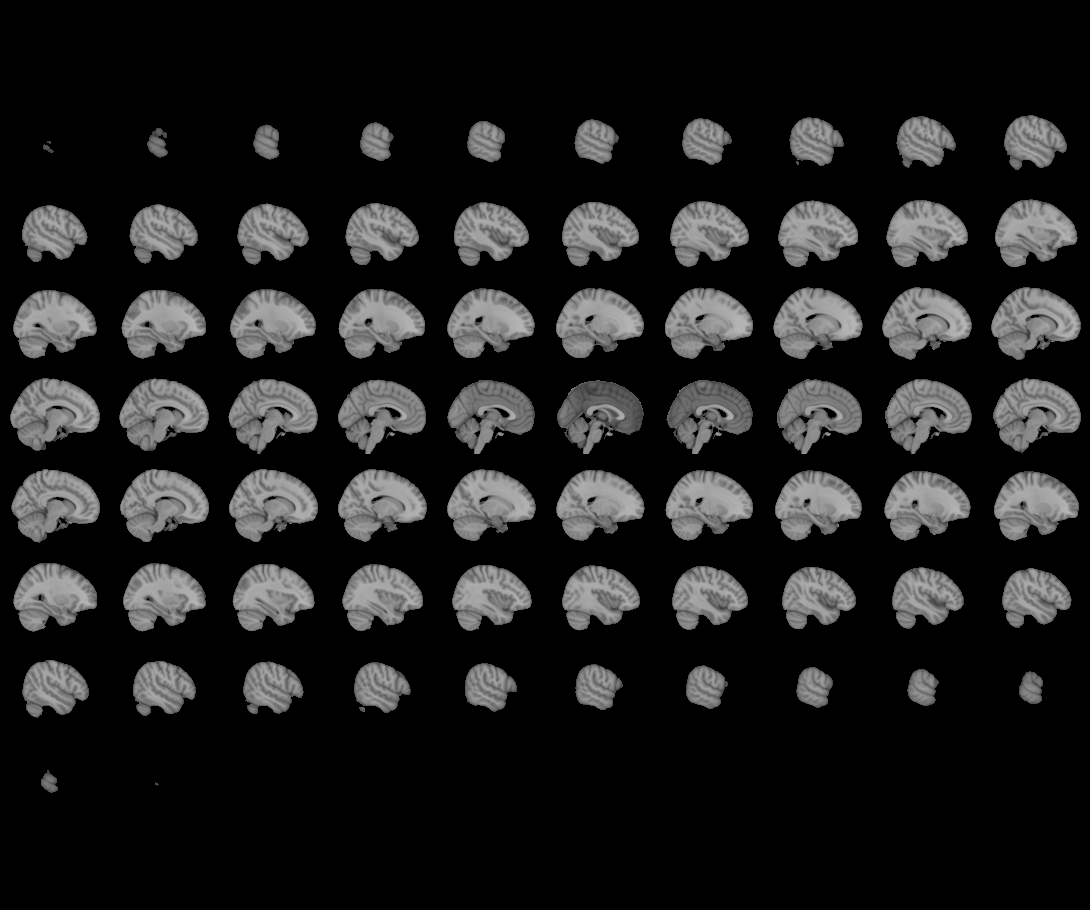
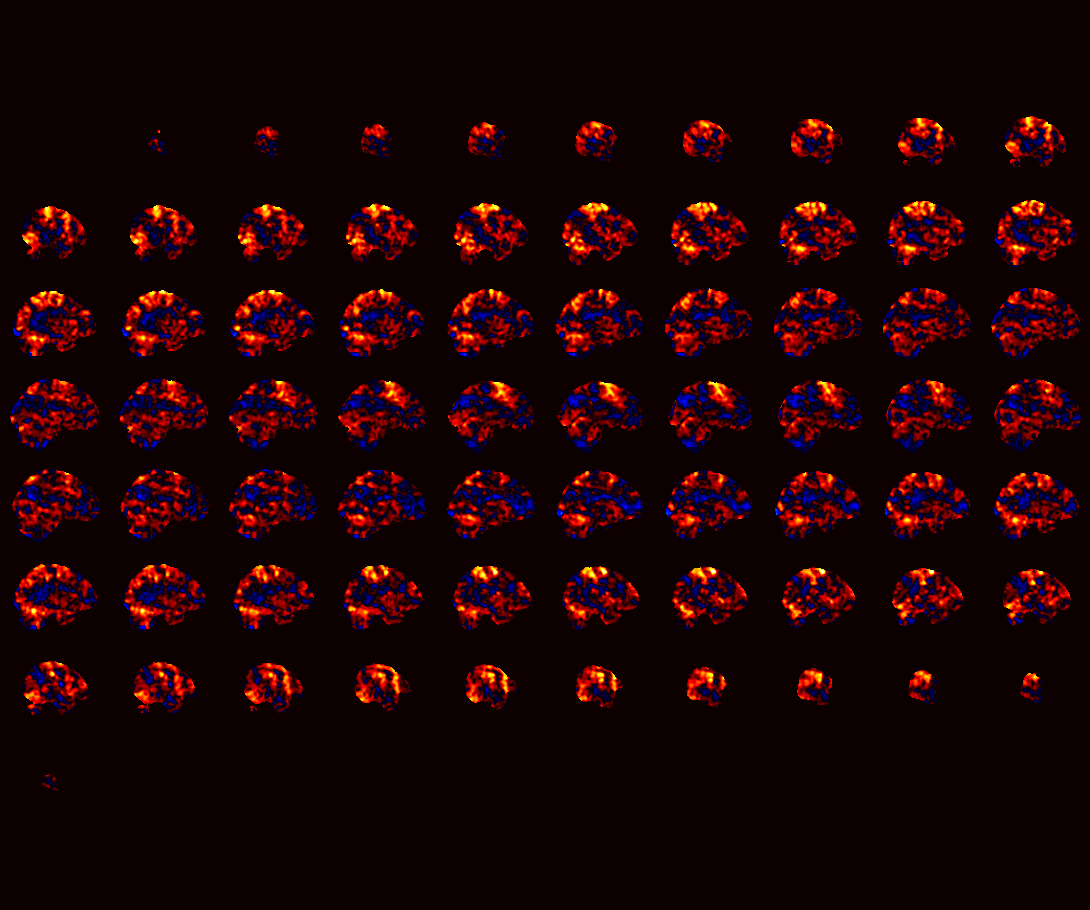

In [ ]:
# vizualization of an fMRI image

df = pd.read_csv('/content/drive/My Drive/Project_final/brain_/data/neurovault/dataframe.csv')
data = df['z_map']
image = data[0]
plotting.view_img(mean_img(image), threshold=None)

In [ ]:
# create dataframe.csv file for a given dataset, here we did for archi
df = pd.read_csv('/content/drive/My Drive/Project_final/brain_/data/neurovault/dataframe.csv')
myfile = glob.glob('/content/drive/My Drive/Project_final/brain_/data/neurovault/collection_4343/*.nii.gz')

for i in df['study']:
  if i != 'la5c':
    liste = list(getIndexes(df, i))
    df = df.drop([liste[0]])

df.to_csv("/content/drive/My Drive/Project_final/brain_/data/neurovault/collection_4343/dataframe.csv")

In [ ]:
#Check if the length of created dataframe.csv correspond exaclty to the given dataset
df1 = pd.read_csv("/content/drive/My Drive/Project_final/brain_/data/neurovault/collection_4343/dataframe.csv")
print(len(df1), len(myfile),df1['z_map'][0])

# Read data from CSV file

In [ ]:
#After downloading all datasets, just replace each corresponding number to load a dataset
'''
'archi': 4339,

'hcp': 4337,

'brainomics': 4341,

'camcan': 4342,

'la5c': 4343,
'''
DataFrame = pd.read_csv("/content/drive/My Drive/Project_final/brain_/data/neurovault/collection_4339/dataframe.csv")
#Delete Unnamed column in the created dataframe.csv
DataFrame = DataFrame.loc[:, ~DataFrame.columns.str.contains('^Unnamed')]
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   z_map     2340 non-null   object
 1   study     2340 non-null   object
 2   subject   2340 non-null   int64 
 3   task      2340 non-null   object
 4   contrast  2340 non-null   object
dtypes: int64(1), object(4)
memory usage: 91.5+ KB


In [ ]:
# Drop unecessary columns
DataFrame.drop(['study'], axis='columns', inplace=True)
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   z_map     2340 non-null   object
 1   subject   2340 non-null   int64 
 2   task      2340 non-null   object
 3   contrast  2340 non-null   object
dtypes: int64(1), object(3)
memory usage: 73.2+ KB


In [ ]:
#Combination of the Contrast and Task that gives the labels
DataFrame['Contrast_task'] = DataFrame['task'] + ' ' +   DataFrame['contrast']

In [ ]:
DataFrame.head()

,z_map,subject,task,contrast,Contrast_task
0,/content/drive/My Drive/Project_final/brain_/d...,14,parietal,object_grasp,parietal object_grasp
1,/content/drive/My Drive/Project_final/brain_/d...,48,localizer,damier_V,localizer damier_V
2,/content/drive/My Drive/Project_final/brain_/d...,73,localizer,damier_H,localizer damier_H
3,/content/drive/My Drive/Project_final/brain_/d...,75,localizer,motor-cognitive,localizer motor-cognitive
4,/content/drive/My Drive/Project_final/brain_/d...,24,localizer,clicGvideo,localizer clicGvideo


In [ ]:
# split dataframe into train and test
DataFrame_copy = DataFrame.copy()
train_set = DataFrame_copy.sample(frac=0.75, random_state=0)
test_set = DataFrame_copy.drop(train_set.index)

print ('Training set')
print (train_set)
print ('\nTest set')
print (test_set)

Training set
                                                  z_map  ...                   Contrast_task
1980  /content/drive/My Drive/Project_final/brain_/d...  ...          social triangle_random
2078  /content/drive/My Drive/Project_final/brain_/d...  ...                 localizer audio
9     /content/drive/My Drive/Project_final/brain_/d...  ...                parietal saccade
1117  /content/drive/My Drive/Project_final/brain_/d...  ...           emotional face_trusty
195   /content/drive/My Drive/Project_final/brain_/d...  ...         social mecanistic_audio
...                                                 ...  ...                             ...
250   /content/drive/My Drive/Project_final/brain_/d...  ...  emotional expression_intention
1267  /content/drive/My Drive/Project_final/brain_/d...  ...       localizer motor-cognitive
1971  /content/drive/My Drive/Project_final/brain_/d...  ...         social mecanistic_audio
1059  /content/drive/My Drive/Project_final/brain_/d...  

In [ ]:
#z_map correspond to each image that we want to feed inside a deep learning model and Task correspond to the labels we want to predict 
X_train = train_set.pop('z_map')
label_train = train_set.pop('Contrast_task')
X_test = test_set.pop('z_map')
label_test = test_set.pop('Contrast_task')

In [ ]:
DataFrame.head()

,z_map,subject,task,contrast,Contrast_task
0,/content/drive/My Drive/Project_final/brain_/d...,14,parietal,object_grasp,parietal object_grasp
1,/content/drive/My Drive/Project_final/brain_/d...,48,localizer,damier_V,localizer damier_V
2,/content/drive/My Drive/Project_final/brain_/d...,73,localizer,damier_H,localizer damier_H
3,/content/drive/My Drive/Project_final/brain_/d...,75,localizer,motor-cognitive,localizer motor-cognitive
4,/content/drive/My Drive/Project_final/brain_/d...,24,localizer,clicGvideo,localizer clicGvideo


In [ ]:
#convert categorical value of the lable to numerical value. Here we used LabelEncoder but there is many ways to do this.
#Preprocessing using label encoder
le = preprocessing.LabelEncoder()
label = DataFrame_copy.pop('Contrast_task')
le.fit(label)
list(le.classes_)
num_classes = len(list(le.classes_))

In [ ]:
#convert categorical value to numerical value using label Encoder
y_train_list =  list(label_train)
y_test_list = list(label_test)
New_y_train = le.transform(y_train_list)
New_y_test = le.transform(y_test_list)

In [ ]:
# create dataframe
def convert_to_dataframe(list1, list2):
    Dict_dataset = {'images': list1, 'labels':list2}
    df1 = pd.DataFrame(Dict_dataset, columns = ['images', 'labels'])
    return df1

In [ ]:
#Label Encoder
train_dataframe = convert_to_dataframe(X_train, New_y_train )
test_dataframe = convert_to_dataframe(X_test, New_y_test)

In [ ]:
# DUE TO COMPUTATIONAL LIMITATION WE ARE FORCED TO SLICE THE DATAFRAME AND JUST TAKE A PORTION
dframe_train = train_dataframe.sample(n=825, random_state=50) 
dframe_test = test_dataframe.sample(n=275, random_state=50)

In [ ]:
list_images_train = list(dframe_train['images'])
list_images_test = list(dframe_test['images'])

#Replicate labels

list_labels_train = list(itertools.chain.from_iterable(itertools.repeat(x, 109) for x in list(dframe_train['labels'])))
list_labels_test = list(itertools.chain.from_iterable(itertools.repeat(x, 109) for x in list(dframe_test['labels'])))

# #For the brainnomics, camcan
# list_labels_train = list(itertools.chain.from_iterable(itertools.repeat(x, 63) for x in list(dframe_train['labels'])))
# list_labels_test = list(itertools.chain.from_iterable(itertools.repeat(x, 63) for x in list(dframe_test['labels'])))


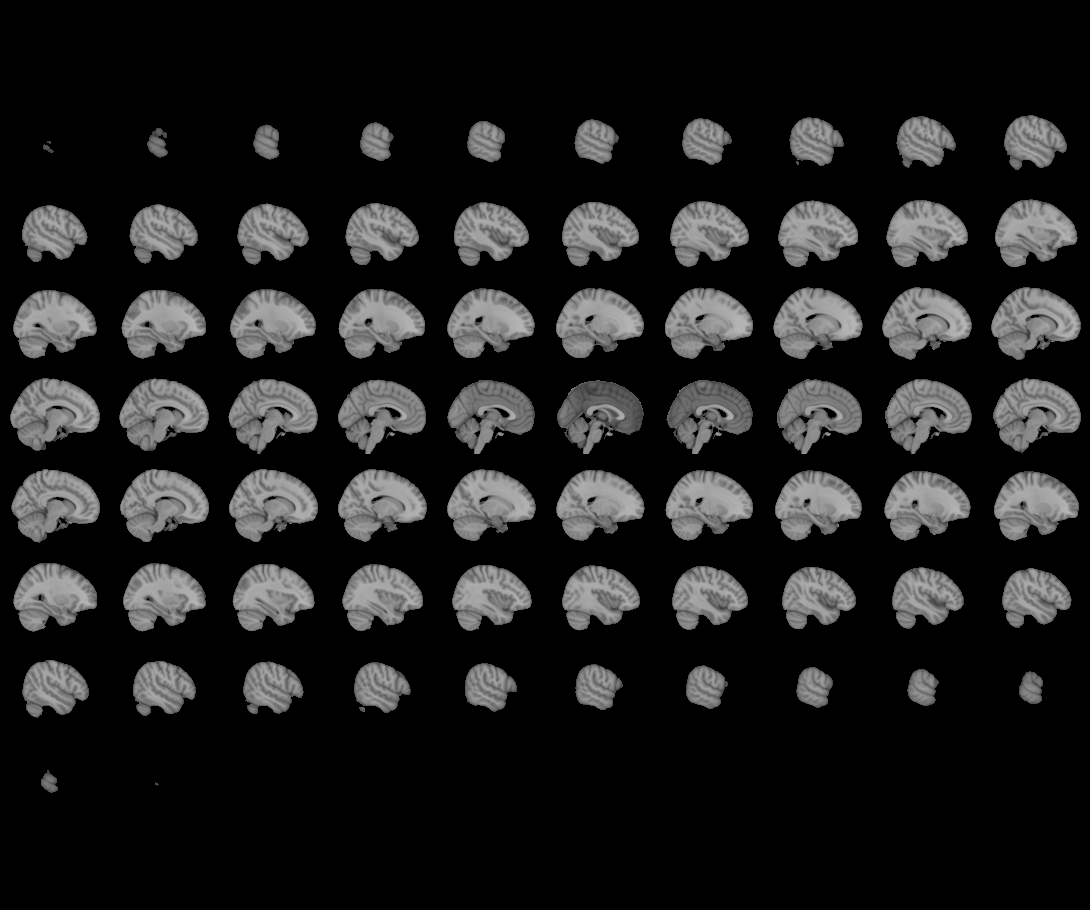
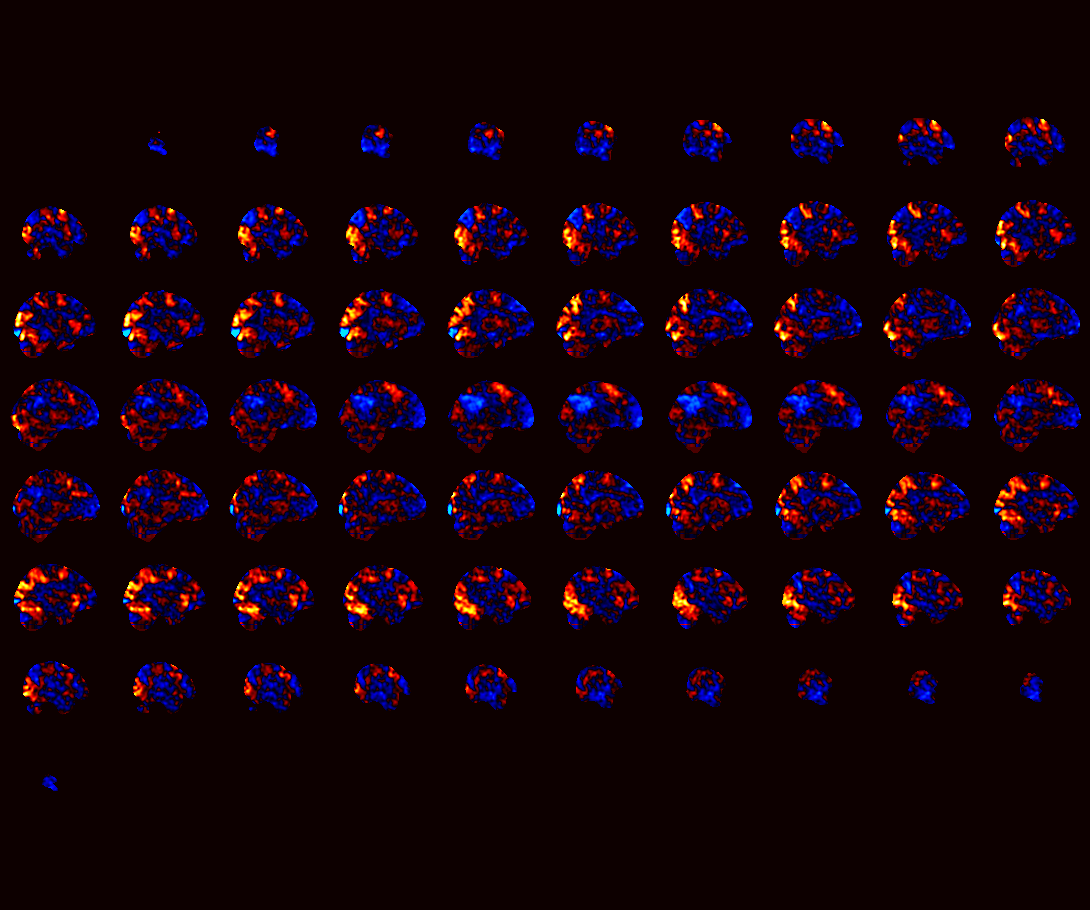

In [ ]:
myfile = glob.glob(list_images_train[0])
plotting.view_img(mean_img(myfile), threshold=None)

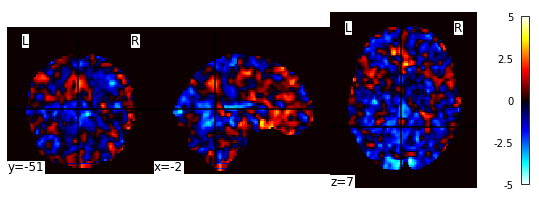

In [ ]:
fig = plotting.plot_stat_map(mean_img(myfile), threshold=None)
fig.savefig('Stat_map_la5c.png')  

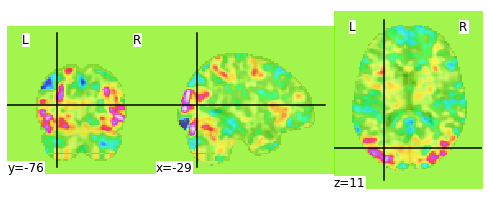

In [ ]:
fig = plotting.plot_roi(mean_img(myfile), threshold=None)
fig.savefig('ROI_la5c.png') 

# Create dataloader

In [ ]:
def load_image(list_of_images_path):
  IMAGES = []
  for element in list_of_images_path:
    img = nib.load(element)
    data = img.get_fdata()
    data = data.reshape(109, 91, -1) # for archi, hcp, la5c
    # data =  data.reshape(63, 53, -1) # for  brainomics, camcan
    #slices is happening here
    for elem in data:
      IMAGES.append(elem)
  return IMAGES

def convert_list_to_dataframe(list1, name_column):
    Dict_dataset = {name_column: list1, }
    df1 = pd.DataFrame(Dict_dataset, columns = [name_column])
    return df1

IMAGES_train = load_image(list_images_train)
IMAGES_test = load_image(list_images_test)

dataframe_images_train = convert_list_to_dataframe(IMAGES_train, 'Images') 
dataframe_images_test = convert_list_to_dataframe(IMAGES_test, 'Images')
dataframe_labels_train = convert_list_to_dataframe(list_labels_train, 'labels') 
dataframe_labels_test = convert_list_to_dataframe(list_labels_test, 'labels')

result_train = pd.concat([dataframe_images_train, dataframe_labels_train], axis=1)
result_test = pd.concat([dataframe_images_test, dataframe_labels_test], axis=1)

Liste_train = list(result_train['Images'].values)
Liste_test = list(result_test['Images'].values)

result_train =  result_train.drop(['Images'], axis=1)
result_test =  result_test.drop(['Images'], axis=1)

ARRAY_train = np.array(Liste_train, dtype = np.float32)
ARRAY_test = np.array(Liste_test, dtype = np.float32)

Images_torch_train = torch.from_numpy(ARRAY_train)
Images_torch_test = torch.from_numpy(ARRAY_test)

train_label = torch.tensor(result_train['labels'].values)
test_label = torch.tensor(result_test['labels'].values)

train_tensor = data_utils.TensorDataset(Images_torch_train, train_label) 
test_tensor = data_utils.TensorDataset(Images_torch_test, test_label)

# #creata dataloader using torch
#for archi, hcp, la5c
train_loader = data_utils.DataLoader(dataset = train_tensor, batch_size = 109, shuffle = False)

test_loader = data_utils.DataLoader(dataset = test_tensor, batch_size = 109, shuffle = False) # In general shuffle should be False for testset but due the replicate part of each label, we set shuffle as False

# for  brainomics, camcan
# train_loader = data_utils.DataLoader(dataset = train_tensor, batch_size = 63, shuffle = False)

# test_loader = data_utils.DataLoader(dataset = test_tensor, batch_size = 63, shuffle = False) # In general shuffle should be False for testset but due the replicate part of each label, we set shuffle as False

In [ ]:
# delete some variables to free memory
del (DataFrame, train_set, test_set, X_train, label_train, X_test, label_test, y_train_list, y_test_list, New_y_train, New_y_test, train_dataframe, test_dataframe, dframe_train, list_images_train, IMAGES_train, dataframe_images_train, result_train, Liste_train, ARRAY_train, train_label , train_tensor, dframe_test, list_images_test, IMAGES_test, dataframe_images_test, result_test, Liste_test, ARRAY_test, test_label , test_tensor)

In [ ]:
!free -h
# !nvidia-smi -L
# !nvidia-smi
# !nvcc --version
# !lscpu |grep 'Model name'
# !lscpu |grep 'Core(s) per socket:'
# !lscpu |grep 'Thread(s) per core:'

              total        used        free      shared  buff/cache   available
Mem:            12G         11G        263M        964K        593M        8.0G
Swap:            0B          0B          0B


# Model

In [ ]:
#Convolutional Neural Network
class Simple_ConvNet(nn.Module):
    def __init__(self, num_classes):
      super(Simple_ConvNet, self).__init__()

      self.layer1 = nn.Sequential(
          nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
          nn.BatchNorm2d(16),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2))
      
      self.layer2 = nn.Sequential(
          nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
          nn.BatchNorm2d(32),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2))
      
      self.layer3 = nn.Sequential(
          nn.Conv2d(32, 32, kernel_size=5, stride=1, padding=2),
          nn.BatchNorm2d(32),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2))#, nn.Dropout(0.8))
      
      self.layer4 = nn.Sequential(
          nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
          nn.BatchNorm2d(64),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2))
      
      self.layer5 = nn.Sequential(
          nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=2),
          nn.BatchNorm2d(64),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2))
      
      #comment the following layer for brainomics and camcan
      self.layer6 = nn.Sequential(
          nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=2),
          nn.BatchNorm2d(128),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2))

      self.fc = nn.Linear(128, num_classes)
        
    def forward(self, x):
      out = self.layer1(x)
      out = self.layer2(out)
      out = self.layer3(out)
      out = self.layer4(out)
      out = self.layer5(out)
      #uncomment the following line for hcp, archi and la5c
      out = self.layer6(out)


      out = out.reshape(out.size(0), -1)
      out = self.fc(out)

      return out

In [ ]:
# Device configuration
#Simple_ConNet
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# model#
net = Simple_ConvNet(num_classes).to(device)

In [ ]:
net.share_memory()

Simple_ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): B

In [ ]:
def accuracy(output, target, topk=(1,)):
    with torch.no_grad():
        maxk = max(topk)
        batch_size = target.size(0)

        _, pred = output.topk(maxk, 1, True, True)
        pred = pred.t()
        correct = pred.eq(target.view(1, -1).expand_as(pred))

        res = []
        for k in topk:
            correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
            res.append(correct_k.mul_(100.0 / batch_size))
        return res

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.002, weight_decay=1e-3)

In [ ]:
for i, (images, labels) in enumerate(train_loader):
  images = images.reshape(-1, 1, 91, 91)
  print(images.shape)
  break

torch.Size([109, 1, 91, 91])


In [ ]:
#Training for a Simple ConvNet
num_epochs = 100
top_1_train = []
top_1_test = []
# loop over the dataset multiple times
total_step = len(train_loader)
for epoch in range(num_epochs):
    print('Epoch: {}'.format(epoch+1))
    
    # train for 1 epoch on the train set
    correct = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(109, 1, 91, 91) # for archi, hcp, la5c
        # images = images.reshape(63, 1, 53, -1)# for brainomics, camcan
        images = images.to(device)
        labels = labels.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward 
        outputs = net(images)
        #we combine the slices and predict a label
        outputs, inds = torch.mode(outputs ,dim=0)
        outputs = outputs.reshape(1, -1)
        labels = torch.unique(labels)
        loss = criterion(outputs, labels)
        
        # backward
        loss.backward()
        
        # gradient step 
        optimizer.step()
        
        # compute accuracy 
        correct += accuracy(outputs, labels)[0].item() / 100
        if (i+1) % 300 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    top_1 = correct / len(train_loader) * 100
    top_1_train.append(top_1)
    print('Train Accuracy of the model: {} %'.format(top_1)) 
            
    # evaluate on the test set 
    with torch.no_grad():
        correct = 0
        for images, labels in test_loader:

          images = images.reshape(109, 1, 91, 91) # for archi and hcp, la5c
          # images = images.reshape(63, 1, 53, -1)# for brainomics, camcan
          images = images.to(device)
          labels = labels.to(device)
        
          # forward 
          outputs = net(images)
          #we combine the 109 slices and predict a label
          outputs, inds = torch.mode(outputs ,dim=0)
          outputs = outputs.reshape(1, -1)
          labels = torch.unique(labels)
          loss = criterion(outputs, labels)
  
          # compute accuracy 
          correct += accuracy(outputs, labels)[0].item() / 100
     
    top_1 = correct / len(test_loader) * 100
    top_1_test.append(top_1)
    print('Test Accuracy of the model: {} %'.format(top_1))

Epoch: 1
Epoch [1/100], Step [300/825], Loss: 3.3268
Epoch [1/100], Step [600/825], Loss: 3.4330
Train Accuracy of the model: 3.7575757575757573 %
Test Accuracy of the model: 2.909090909090909 %
Epoch: 2
Epoch [2/100], Step [300/825], Loss: 3.3588
Epoch [2/100], Step [600/825], Loss: 3.3644
Train Accuracy of the model: 4.0 %
Test Accuracy of the model: 2.909090909090909 %
Epoch: 3
Epoch [3/100], Step [300/825], Loss: 3.3247
Epoch [3/100], Step [600/825], Loss: 3.3391
Train Accuracy of the model: 4.121212121212121 %
Test Accuracy of the model: 3.6363636363636362 %
Epoch: 4
Epoch [4/100], Step [300/825], Loss: 3.3409
Epoch [4/100], Step [600/825], Loss: 3.3273
Train Accuracy of the model: 5.696969696969697 %
Test Accuracy of the model: 2.909090909090909 %
Epoch: 5
Epoch [5/100], Step [300/825], Loss: 3.2638
Epoch [5/100], Step [600/825], Loss: 3.4018
Train Accuracy of the model: 5.696969696969697 %
Test Accuracy of the model: 2.909090909090909 %
Epoch: 6
Epoch [6/100], Step [300/825], Lo

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(top_1_train, label='Train accuracy')
plt.plot(top_1_test, label='Test accuracy')
plt.xlabel('Epoch')
# plt.xscale('log10')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Results

# Simple_convNet
archi: train: 70.48 %% , test: 45.18%

hcp:  train: 59.51  , test: 49.81%

brainomics: train: 5.56% , test: 4,54%   

camcan: train: 49.54%  , test:  42.27%

la5c: train:   , test: 

In [ ]:
del net

An axial slicing was performed on the data (here with respect to the first axe)  so the format of our data has changed from (Num_datapoint, Height, Width) to ( Batch, 1 , Height, Width). LSTM is now no use since our data is no longer in a format of time series data. You can see in the following that the LSTM model will fail.

In [ ]:
#Convolutional Neural Network + bidirectionnal LSTM
class ConvNet_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
      super(ConvNet_LSTM, self).__init__()
      self.hidden_size = hidden_size
      self.num_layers = num_layers
      
      self.layer1 = nn.Sequential(
          nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
          nn.BatchNorm2d(16),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2), nn.Dropout(0.8))
      
      self.layer2 = nn.Sequential(
          nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
          nn.BatchNorm2d(32),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2))
      
      self.layer3 = nn.Sequential(
          nn.Conv2d(32, 32, kernel_size=5, stride=1, padding=2),
          nn.BatchNorm2d(32),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2))
      
      self.layer4 = nn.Sequential(
          nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
          nn.BatchNorm2d(64),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2), nn.Dropout(0.8))
      
      self.layer5 = nn.Sequential(
          nn.Conv2d(64, 64, kernel_size=5, stride=1, padding=2),
          nn.BatchNorm2d(64),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2))
      #comment the following layer for brainomics and camcan
      self.layer6 = nn.Sequential(
          nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=2),
          nn.BatchNorm2d(128),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2, stride=2))

      self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True) 
      
      self.fc = nn.Linear(hidden_size*2, num_classes)
        
    def forward(self, x):
      out = self.layer1(x)
      out = self.layer2(out)
      out = self.layer3(out)
      out = self.layer4(out)
      out = self.layer5(out)
      #comment the following line for brainomics and camcan
      out = self.layer6(out)

      out =  out.reshape(-1, sequence_length, input_size)

      # Set initial states
      h0 = torch.zeros(self.num_layers*2, out.size(0), self.hidden_size).to(device) 
      c0 = torch.zeros(self.num_layers*2, out.size(0), self.hidden_size).to(device) 
  
      out, _ = self.lstm(out, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size*2)
      out = self.fc(out[:, -1, :])

      return out

In [ ]:
#ConvNet + LSTM bi-directional
input_size = 1
hidden_size= 20
num_layers = 2
sequence_length = 128
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net = ConvNet_LSTM(input_size, hidden_size, num_layers, num_classes).to(device)

In [ ]:
net.share_memory()

ConvNet_LSTM(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.8, inplace=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stri

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.002, weight_decay=1e-3)

In [ ]:
for images, labels in train_loader:
  print(images.shape)
  print(labels.shape)
  break

torch.Size([109, 91, 91])
torch.Size([109])


In [ ]:
  #Training for the ConvNet_biLSTM

num_epochs = 100
clip_value = 5

top_1_train = []
top_1_test = []
# loop over the dataset multiple times
total_step = len(train_loader)
for epoch in range(num_epochs):
    print('Epoch: {}'.format(epoch+1))
    
    # train for 1 epoch on the train set
    correct = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 1, 91, 91) # for archi and hcp, la5c
        # images = images.reshape(-1, 1, 53, -1)# for brainomics, camcan
        images = images.to(device)
        labels = labels.type(torch.long).to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward 
        outputs = net(images)
        loss = criterion(outputs, labels)
        
        # backward
        loss.backward()
        torch.nn.utils.clip_grad_norm_(net.parameters(), clip_value )
        
        # gradient step 
        optimizer.step()
        
        # compute accuracy 
        correct += accuracy(outputs, labels)[0].item() / 100
        if (i+1) % 300 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    top_1 = correct / len(train_loader) * 100
    top_1_train.append(top_1)
    print('Train Accuracy of the model: {} %'.format(top_1))
            
    # evaluate on the test set  
    with torch.no_grad():
        correct = 0
        for images, labels in test_loader:
          images = images.reshape(-1, 1, 91, 91) # for archi, la5c and hcp
          # images = images.reshape(-1, 1, 53, -1)# for brainomics, camcan
          images = images.to(device)
          labels = labels.type(torch.long).to(device)
        
          # forward 
          outputs = net(images)
          loss = criterion(outputs, labels)
  
          # compute accuracy 
          correct += accuracy(outputs, labels)[0].item() / 100
     
    top_1 = correct / len(test_loader) * 100
    top_1_test.append(top_1)
    print('Test Accuracy of the model: {} %'.format(top_1))

Epoch: 1
Epoch [1/100], Step [300/825], Loss: 3.2772
Epoch [1/100], Step [600/825], Loss: 3.5685
Train Accuracy of the model: 4.308034460255594 %
Test Accuracy of the model: 2.5454545454545454 %
Epoch: 2
Epoch [2/100], Step [300/825], Loss: 3.3795
Epoch [2/100], Step [600/825], Loss: 3.6667
Train Accuracy of the model: 3.7453433412494084 %
Test Accuracy of the model: 2.5454545454545454 %
Epoch: 3
Epoch [3/100], Step [300/825], Loss: 3.3891
Epoch [3/100], Step [600/825], Loss: 3.7123
Train Accuracy of the model: 4.242424242424243 %
Test Accuracy of the model: 3.6363636363636362 %
Epoch: 4
Epoch [4/100], Step [300/825], Loss: 3.4045
Epoch [4/100], Step [600/825], Loss: 3.7294
Train Accuracy of the model: 4.6060606060606055 %
Test Accuracy of the model: 3.6363636363636362 %
Epoch: 5
Epoch [5/100], Step [300/825], Loss: 3.4109
Epoch [5/100], Step [600/825], Loss: 3.7421
Train Accuracy of the model: 4.484848484848484 %
Test Accuracy of the model: 3.6363636363636362 %
Epoch: 6
Epoch [6/100],

KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(top_1_train, label='Train accuracy')
plt.plot(top_1_test, label='Test accuracy')
plt.xlabel('Epoch')
# plt.xscale('log10')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Results

# ConvNet +  LSTM bi-directional 

archi: train: 4.31%  , test: 3.63%

hcp:  train: 5.34%  , test: 4.09%

brainomics: train: 5.56% , test: 4.54%

camcan: train: 23.06% , test: 20.90%

la5c: train:  5.22%     , test: 3.18%   